# Projeto 2-Ciência dos Dados


# Predição de AVC

Alunos:

Jonas Bonfá

Renato Falcão

Gabriel de Araújo 

Ricardo Mourão

# 1. Introdução

## 1.1 O que é AVC?


O AVC (CID 10 - I64) é o entupimento ou rompimento dos vasos que levam sangue ao cérebro, provocando a paralisia da região afetada no cérebro. Também é chamado de acidente vascular cerebral, derrame cerebral ou Acidente Vascular Encefálico (AVE)
Fonte:https://www.minhavida.com.br/saude/temas/avc


## 1.2 Gravidade do Problema


Segundo a Organização Mundial da Saúde (OMS), o AVC é a segunda principal causa de morte no mundo, responsável por aproximadamente 11% do total de óbitos.
Este conjunto de dados é usado para prever se um paciente provavelmente terá um AVC com base nos parâmetros de entrada, como sexo, idade, várias doenças e estado de tabagismo. Cada linha nos dados fornece informações de renome sobre o paciente.
Fonte Traduzida:https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

Sabemos que o AVC ,mais conhecido como acidente vascular cerebral ou derrame,é uma doença que ,nos tempos atuais,acomete ainda um grande número de pessoas ,baseado nisso uma base de dados <a href="https://www.kaggle.com/fedesoriano/stroke-prediction-dataset">sobre pacientes que possuem ou não AVC</a> do site Kaggle que diz respeito a ocorrência de AVCs pretende responder a seguinte pergunta:Baseado nos dados de saúde e socio-econômicos de um paciente será que ele teve ou não um AVC(acidente vascular cerebral)?

Para isso vamos precisar de bibliotecas de machine learning que serão de fundamental importância para a predição do fenômeno análisado,bem como ,2 modelos de predição (Arvore de Decisão e Regressão Logística) que nos ajudarão a responder a pergunta principal!


## 1.3 Importando Bibliotecas necessárias

In [33]:

%matplotlib inline
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd
from random import randint
# Remove warnings
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML  # Para ter melhor print.


In [34]:
print("Esperamos trabalhar no diretório")
print(os.getcwd())
filename = 'healthcare-dataset-stroke-data.csv'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook da avaliação, yay!\n')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'O notebook e os arquivos de dados desta avaliação devem ser salvos dentro da mesma pasta no seu computador.\n')

Esperamos trabalhar no diretório
C:\Users\gabri\OneDrive - Insper - Institudo de Ensino e Pesquisa\Faculdade\2° semestre\Cdados\Projeto2-Cdados\CDADOS_P2
Parece que o arquivo healthcare-dataset-stroke-data.csv está na mesma pasta do notebook da avaliação, yay!



## 1.4 Base de Dados

A base dados contém algumas informações coletadas de vários pacientes no momento do exame. A seguir, estão descritas as informações originais contidas no dataset:
<ol>
<li>id: Informação referente a identificação do paciente(será retirada do dataset pois não importa para a análise)
<li>gender:Gênero do paciente(Male ou Female)-Será alterado para homem e mulher 

<li>age:Idade do paciente(em anos)

<li>hypertension(Hipertensão):<br>	
    <ul>
        <li>0:Paciente não tem hipertensão  
        <li>1: Paciente têm Hipertensão
    </ul>
<li>heart_disease(cardiopatia):<br>
    <ul>
    <li>0:Paciente não têm cardiopatia
    <li>1:Paciente possui cardiopatia
    </ul>
<li>ever_married(já foi ou é casado):<br>	
    <ul>
    <li>"Yes":È ou ja foi casado em algum momento
    <li>"No":Nunca se casou
    </ul>
<li>work_type(tipo de trabalho do paciente):<br>
    <ul>
    <li>Private:Trabalho Privado          
    <li>Self-employed:Autônomo     
    <li>children:Criança-Não Trabalha          
    <li>Govt_job:Trabalha para algum governo          
    <li>Never_worked:Nunca Trabalhou 
    </ul>
<li>Residence_type(tipo de Residência):<br>
    <ul>
    <li>Urban:Urbana
    <li>Rural:Rural
    </ul>
<li>avg_glucose_level:Refere-se ao nível médio de glucose do paciente no sangue<br>

<li>bmi(body mass index):Índice de massa corporea(relação entre altura e peso)<br>

<li>smoking_status:Status de fumante<br>
    <ul>
    <li>never smoked:Nunca fumou       
    <li>Unknown:Informação desconhecida            
    <li>formerly smoked:Ex-fumante     
    <li>smokes:Fuma atualmente 
    </ul>
<li>stroke:indica se o paciente teve ou não AVC<br>
    <ul>
    <li>0:Não teve AVC
    <li>1:teve AVC
    </ul>



# Target ,Features e mudanças principais para a base de dados

Target:No caso a váriavel escolhida foi o Stroke ,ou seja ,se o paciente teve ou não AVC.Nesse sentido,essa é a variável dependente,isto é,ela dependerá de todas as outras para a ánalise dos dados e predição da pergunta feita anteriormente.<br>
Features:Variáveis independentes são consideradas todas as outras colunas do dataset que irão auxiliar na predição da variável target.

Mudanças necessárias:<br>
    -Transformar algumas colunas(variáveis) para categóricas:Gender,Hypertension,heart_disease,stroke(possuem 0 ou 1 nos dados)<br>
    -Colocar em português as categorias de variáveis como:ever_married,work_type,Residence_type,smoking_status ,bem como ,deixar em português todas as colunas do dataframe <br>
    -Limpar ou incrementar possíveis dados nulos no dataframe<br>
    -Indentificar,nas variáveis quantitativas, quem destoa de algum padrão e,por isso ,pode ficar de fora do dataset,lembrando que chamamos de outliers.<br>

# Base de dados Original

In [86]:
Stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
Stroke.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Implementando Categorização nas variáveis ordinais

In [87]:
#transformando variáveis em categóricas
Stroke['gender'] = Stroke['gender'].astype('category')
Stroke['hypertension'] =Stroke['hypertension'].astype('category')
Stroke['stroke'] = Stroke['stroke'].astype('category')
Stroke['smoking_status'] = Stroke['smoking_status'].astype('category')
Stroke['Residence_type'] = Stroke['Residence_type'].astype('category')
Stroke['work_type'] = Stroke['work_type'].astype('category')
Stroke['heart_disease'] = Stroke['heart_disease'].astype('category')
Stroke["ever_married"]=Stroke['ever_married'].astype('category')
#Categorizando as variáveis com diferentes nomes afim de facilitar nossa análise
Stroke['gender'].cat.categories = ["Mulher","Homem","Outro"]
Stroke['hypertension'].cat.categories =["Não Hipertenso","Hipertenso"]
Stroke['stroke'].cat.categories = ["Saudável","Doente"]
Stroke['smoking_status'].cat.categories = ["Desconhecido","Ex-Fumante","Nunca Fumou","Fumante"]
Stroke['Residence_type'].cat.categories = ["Rural","Urbano"]
Stroke['work_type'].cat.categories = ["Trabalho Governamental","Nunca Trabalhou","Privado"," Trabalhador Autônomo","Criança"]                
Stroke['heart_disease'].cat.categories = ['Não Cardiopata',"Cardiopata"]
Stroke["ever_married"].cat.categories=["Não","Sim"]


#Retirando coluna ID(não servirá para nossa amostra pois contem somente a identificação dos pacientes)
Stroke.drop(columns=["id"],inplace=True)




In [88]:
Stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Homem,67.0,Não Hipertenso,Cardiopata,Sim,Privado,Urbano,228.69,36.6,Ex-Fumante,Doente
1,Mulher,61.0,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,202.21,NaN,Nunca Fumou,Doente
2,Homem,80.0,Não Hipertenso,Cardiopata,Sim,Privado,Rural,105.92,32.5,Nunca Fumou,Doente
3,Mulher,49.0,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,171.23,34.4,Fumante,Doente
4,Mulher,79.0,Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,174.12,24.0,Nunca Fumou,Doente


# Modificando linhas nulas

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

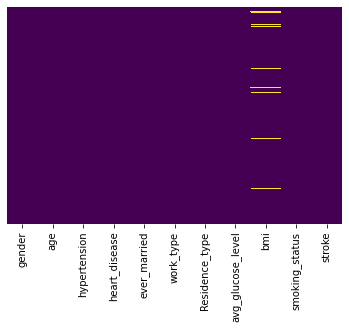

In [89]:
#heatmap da biblioteca seaborn para identificar elementos nulos ,bem como, o comando isnull que verifica linhas nulas
sns.heatmap(Stroke.isnull(),yticklabels=False,cbar=False,cmap="viridis")
Stroke.isnull().sum()

Observações:<br>
        -Na coluna BMI(indíce de massa corporéa) há 201 linhas nulas<br>
        -Posteriormente na identificação de outliers as linhas nulas serão sujeitas a análise e poderão ser ou não retiradas do dataframe

In [90]:
#Base de dados com categorizações em portugues para melhor visualização
Stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Homem,67.0,Não Hipertenso,Cardiopata,Sim,Privado,Urbano,228.69,36.6,Ex-Fumante,Doente
1,Mulher,61.0,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,202.21,NaN,Nunca Fumou,Doente
2,Homem,80.0,Não Hipertenso,Cardiopata,Sim,Privado,Rural,105.92,32.5,Nunca Fumou,Doente
3,Mulher,49.0,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,171.23,34.4,Fumante,Doente
4,Mulher,79.0,Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,174.12,24.0,Nunca Fumou,Doente


# Indentificação de possíveis Linhas fora de padrão(Outliers)

In [91]:
Stroke.gender.value_counts()

Mulher    2994
Homem     2115
Outro        1
Name: gender, dtype: int64

Observações:Para o gênero observamos um paciente com gênero não identificado como mulher ou homem,no entanto ,para 5110 pacientes apenas 1 paciente fora desses dois gêneros constitui algo fora do padrão por isso retirá-lo da amostra não impactará grandemente no resultado.Além disso ,para esse paciente identificado não há outro paciente para que possam ser feitas comparações e análises.Logo,retirá-lo não impactará

In [92]:
#Retirando esse paciente
Stroke[Stroke.gender=="Outro"]
Stroke.drop(index=3116,inplace=True)


In [93]:
Stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Homem,67.0,Não Hipertenso,Cardiopata,Sim,Privado,Urbano,228.69,36.6,Ex-Fumante,Doente
1,Mulher,61.0,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,202.21,NaN,Nunca Fumou,Doente
2,Homem,80.0,Não Hipertenso,Cardiopata,Sim,Privado,Rural,105.92,32.5,Nunca Fumou,Doente
3,Mulher,49.0,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,171.23,34.4,Fumante,Doente
4,Mulher,79.0,Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,174.12,24.0,Nunca Fumou,Doente


# Variáveis Quantitativas( Identificando Outliers)

Para as variáveis quantitativas ou numéricas há de se perceber um certo padrão de valores em relação a essas colunas presentes no dataframe.Contudo,pode-se constatar a presença de outliers,isto é ,valores que podem estar ou fora do padrão ou que não possuam sentido físico como ,por exemplo, uma idade negativa(variável age) ou valores de glicose(variável avg_glucose_level) acima do esperado.Por isso,a indentificação para possível retirada desses valores é de fundamental importância para o prosseguimento das análises.

In [94]:
var_numericas=Stroke.iloc[:,[1,7,8]]

In [95]:
#divisão dos pacientes entre doentes e saudáveis(para a variável Stroke)-Quem teve ou não AVC
stroke_column=list(Stroke.stroke.value_counts().index)
#importando bibliotecas para a análise interativa
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

        

In [96]:
#BMI(Indice de massa corporal)
@interact(numericas=sorted(['age','avg_glucose_level','bmi']))
def grafico_numericas(numericas):    
#     for coluna in numericas:
        plt.figure(figsize=(18,6))
        #histplot
        plt.subplot(121)
        sns.histplot(data=Stroke, x=Stroke[numericas], hue='stroke', hue_order=stroke_column, multiple='layer',
        stat='density', bins=np.arange(min(Stroke[numericas]),max(Stroke[numericas]),6), element='step', palette=['#5683B3', '#E00705'])
        plt.ylabel('Densidade')
        plt.xlabel(f'{numericas}')
        plt.title(f'Densidade da incidência de AVC por {numericas}')
        plt.fontsize=14
        #boxplot
        plt.subplot(122)
        sns.boxplot(x=Stroke.stroke,y=Stroke[numericas],data=Stroke)


interactive(children=(Dropdown(description='numericas', options=('age', 'avg_glucose_level', 'bmi'), value='ag…

Observações:
    <li> Variável Age:Em relação a idade dos pacientes percebe-se ,em relação aos pacientes doentes(que tiveram AVC),a identificação,por meio do gráfico à direita, de 2 valores fora da faixa de números correspondentes a essa categoria,no entanto, segundo estudos do <a href="https://www.hospitalsiriolibanes.org.br/sua-saude/Paginas/avc-pode-ocorrer-criancas-adolescentes-chances-recuperacao-boas.aspx">hospital Sírio Libanes</a> há chances ,apesar de menores,de crianças e jovens desenvolverem AVC(acidente vascular cerebral).Portanto,esses outliers não serão retirados no prosseguimento das análises.
    <li>Variável avg_glucose_level:Para o nível de glicose percebe-se,tanto para os saudáveis quanto para os doentes ,uma faixa de valores que varia de 55 até aproximadamente 272.Sob esse viés, segundo <a href="https://cerpe.com.br/saude/glicose-alta-baixa-normal#:~:text=Valores%20de%20refer%C3%AAncia%20de%20glicemia,inferior%20a%2070%20mg%2FdL.">o site controlaradiabetes</a>índices glicêmicos na faixa de valores citada anteriormente são possíveis ,embora valores acima de 200 já são considerados diabetes e precisam de cuidados.Dessa forma,não foram indentificados valores fisicamente impossíveis ou fora de um certo padrão ,por isso,serão considerados todos os valores.
    <li>Variável BMI:Em relação ao BMI(índice de massa corporea) nota-se,para os pacientes saudáveis, <a href="https://cerpe.com.br/saude/glicose-alta-baixa-normal#:~:text=Valores%20de%20refer%C3%AAncia%20de%20glicemia,inferior%20a%2070%20mg%2FdL.">valores acima de 60</a>, que já são considerados altos e fora do padrão ,no entanto,o valor máximo da variável no dataframe(97.6),bem como,os outros valores acima de 60 são fisicamente possíveis.Sob esse viés,não haverá retirada de linhas para esta variável.
     <li>Não havendo retirada de possíveis outliers ,reitera-se que a não retirada desses valores considerados fora do padrão se deu por alguns motivos:<ul>
         <li>A base de dados se refere aos pacientes análisados em relação ao AVC(Acidente Vascular Cerebral),dessa maneira,não se sabe como esses valores foram coletados e possíveis erros na coleta de informações podem ter sido cometidos,prejudicando a análise feita.
        <li>Os valores encontrados ,apesar de fora do padrão ,não estão totalmente distantes da realidade,nem tampouco  são impossiveis fisicamente.Logo ,não há maiores motivos para a retirada destes números.    

# Modificando BMI(linhas nulas)

In [97]:
#identificacao da correlacao entre o BMI e as outras vairaveis numericas
var_numericas.corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238323,0.333314
avg_glucose_level,0.238323,1.000000,0.175672
bmi,0.333314,0.175672,1.000000


Observacoes:
    <li>Há uma baixa correlação entre a variável BMI e as outras variáveis ,logo, a reposição das linhas nulas em relacao a variável BMI se torna mais dificil.Portanto,sabendo que a base de dados possui mais de 5000 valores pode-se retirar as 201 linhas nulas da variavel BMI sem,no entanto ,identificar prejuizo a posteriores análises dessas variaveis independentes

In [98]:
#retirando linhas nulas
Stroke.dropna(inplace=True)

In [99]:
Stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Homem,67.0,Não Hipertenso,Cardiopata,Sim,Privado,Urbano,228.69,36.6,Ex-Fumante,Doente
2,Homem,80.0,Não Hipertenso,Cardiopata,Sim,Privado,Rural,105.92,32.5,Nunca Fumou,Doente
3,Mulher,49.0,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,171.23,34.4,Fumante,Doente
4,Mulher,79.0,Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,174.12,24.0,Nunca Fumou,Doente
5,Homem,81.0,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,186.21,29.0,Ex-Fumante,Doente


# Análise Exploratória

# Introdução


Agora segue-se ao projeto a análise exploratória de dados que ,por sua vez ,é uma etapa de fundamental importância para entender o comportamento da variável independente(target) em relação as outras variáveis (colunas) da base de dados já limpa.No entanto,a análise feita será dividida na análise das variáveis quantitativas em função da target e das variáveis qualitativas(categóricas) para melhor entendimento do processo

Definindo as duas variáveis,vem que:

   <li>Variáveis numéricas ou quantitativas: são aquelas cujo valor é um número, isto é, são ordinais (exemplos:age,bmi,avg_glucose_level) 
   <li>Variáveis categóricas ou qualitativas: são aquelas que denotam uma classificação ou categoria. Podem ser representadas por números, mas, nesse caso, cada número representa uma dessas categorias (exemplos: gender(masculino e feminino),hypertension(saudável ou doente) entre outros ...)
    


# Análise variáveis quantitativas

In [100]:
#separando o dataframe nas variáveis numéricas junto a variavel resposta
num=Stroke.iloc[:,[1,7,8,10]]
num

,age,avg_glucose_level,bmi,stroke
0,67.0,228.69,36.6,Doente
2,80.0,105.92,32.5,Doente
3,49.0,171.23,34.4,Doente
4,79.0,174.12,24.0,Doente
5,81.0,186.21,29.0,Doente
...,...,...,...,...
5104,13.0,103.08,18.6,Saudável
5106,81.0,125.20,40.0,Saudável
5107,35.0,82.99,30.6,Saudável
5108,51.0,166.29,25.6,Saudável


In [101]:
#Uso do comando groupby para observar as estatísticas das variáveis numericas em função das duas categorias da variavel target
#(pacientes que tiveram AVC ou nao tiveram)
num.groupby(by="stroke").describe().transpose()

stroke                      Saudável      Doente
age               count  4699.000000  209.000000
                  mean     41.763805   67.712919
                  std      22.269312   12.402848
                  min       0.080000   14.000000
                  25%      24.000000   58.000000
                  50%      43.000000   70.000000
                  75%      59.000000   78.000000
                  max      82.000000   82.000000
avg_glucose_level count  4699.000000  209.000000
                  mean    103.995367  134.571388
                  std      42.998546   62.462047
                  min      55.120000   56.110000
                  25%      76.885000   80.430000
                  50%      91.210000  106.580000
                  75%     112.420000  196.920000
                  max     267.760000  271.740000
bmi               count  4699.000000  209.000000
                  mean     28.824431   30.471292
                  std       7.908573    6.329452
                  min      10.300000   16.900000
                  25%      23.400000   26.400000
                  50%      28.000000   29.700000
                  75%      33.100000   33.700000
                  max      97.600000   56.600000

Observações:
        <li>O comando groupby dado acima destaca as principais medidas descritivas que poderão ajudar posteriormente na análise gráfica e possível predição do comportamento de cada categoria de pacientes.

# Variáveis BMI e AVG_glucose_level

Introdução:
    <li>Para as variáveis BMI(índice de massa corporea) e Avg_glucose_level(nível de glicose sanguínea) os gráficos conhecidos como histogramas costumam ser excelentes para a análise dessas e de outras variáveis quantitativas.Por isso ,recorre-se a biblioteca seaborn para a melhor exploração desses dados. 
    
        

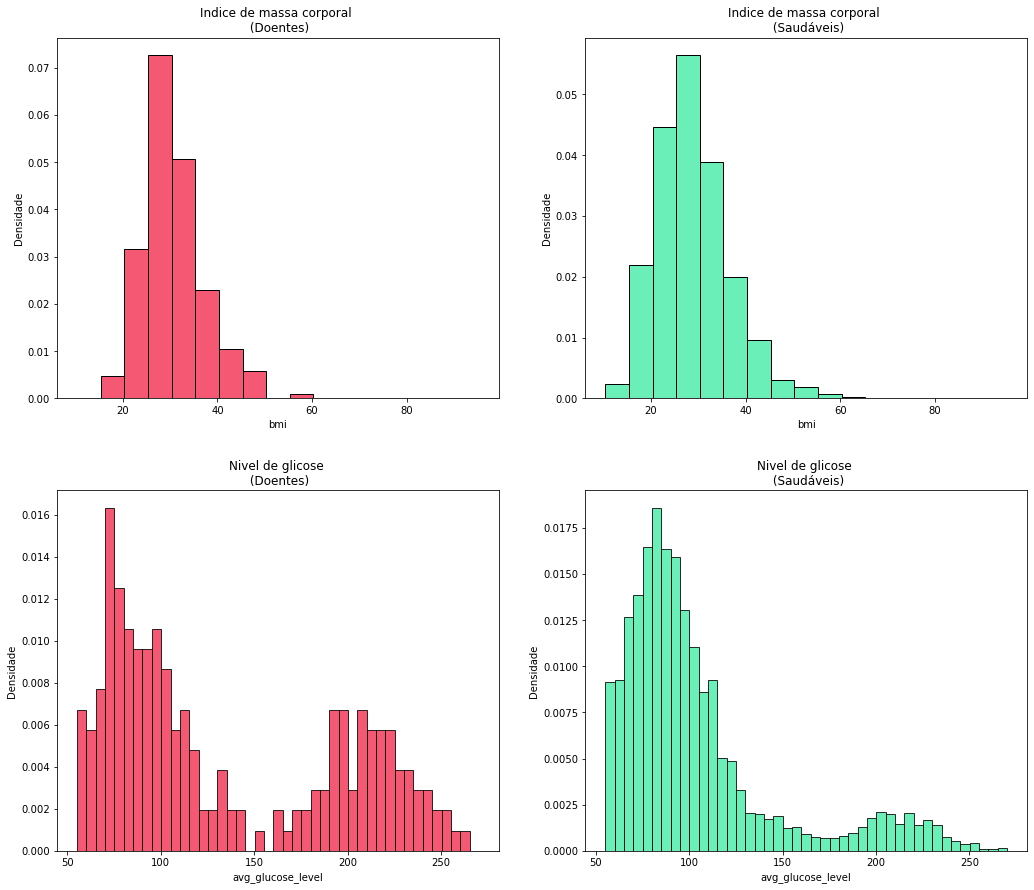

In [102]:
#Lista como o nome das variáveis análisadas
numericas=['bmi','avg_glucose_level']
#separando em categorias daquele que tiveram e não tiveram AVC
doente=Stroke[Stroke.stroke=='Doente']
saudavel=Stroke[Stroke.stroke=='Saudável']


# Função que plota histograma
def plot_hist(dados, x, faixa, cor):
    sns.histplot(dados, x=x, bins=faixa, stat='density', color=cor)
    plt.ylabel('Densidade')
    return None

# Faixa de valores no histograma
faixa_bmi = np.arange(min(Stroke.bmi),max(Stroke.bmi), 5)
faixa_glicose=np.arange(min(Stroke.avg_glucose_level),max(Stroke.avg_glucose_level),5)


# Gera figura para plotagem
plt.figure(figsize=(15,13))

# Pressão sistólica para cardíacos
plt.subplot(2,2,1)
plot_hist(doente, 'bmi', faixa_bmi , '#F12043')
plt.title('Indice de massa corporal \n (Doentes)')
plt.xlabel(f'{numericas[0]}')
# Pressão sistólica para saudáveis
plt.subplot(2,2,2)
plot_hist(saudavel, 'bmi', faixa_bmi , '#39eaa1')
plt.title('Indice de massa corporal \n (Saudáveis)')
plt.xlabel(f'{numericas[0]}')
# Pressão diastólica para cardíacos
plt.subplot(2,2,3)
plot_hist(doente, 'avg_glucose_level', faixa_glicose, '#F12043')
plt.title('Nivel de glicose \n (Doentes)')
plt.xlabel(f'{numericas[1]}')
# Pressão diastólica para saudáveis
plt.subplot(2,2,4)
plot_hist(saudavel, 'avg_glucose_level', faixa_glicose, '#39eaa1')
plt.title('Nivel de glicose \n (Saudáveis)')
plt.xlabel(f'{numericas[1]}')
# Exibe gráficos
plt.tight_layout(pad=3.0)
plt.show()

Conclusão:
    <li>Variável BMI:Em relação ao índice de massa corporea ,observa-se no gráfico uma assimetria à direita para ambos os tipos de paciente.Nesse sentido, para os pacientes doentes há um predomínio de índices na faixa dos 20 kg/m² até 40 kg/m² indicando que até mesmo indices de massa corporea considerados <a href="https://www.tuasaude.com/imc/">ideais"</a>(na faixa dos 20 até 30 ) não são impeditivos em relação a ocorrência de AVC.
    <li>Variável Avg_glucose_level:Para valores de até 150 mg/dl o nível de glicose sanguínea e bem parecido entre doentes e saudáveis.No entanto,para valores acima de 150 mg/dl há um maior predomínio de pacientes doentes em relação aos saudáveis.Logo,pode-se inferir que pacientes diabéticos<a href='https://cerpe.com.br/saude/glicose-alta-baixa-normal#:~:text=Valores%20de%20refer%C3%AAncia%20de%20glicemia,inferior%20a%2070%20mg%2FdL'>(valores acima de 126)</a> tendem a ter maior chance de possuir AVC. 

# Variável age

Text(0.5, 0, 'age')

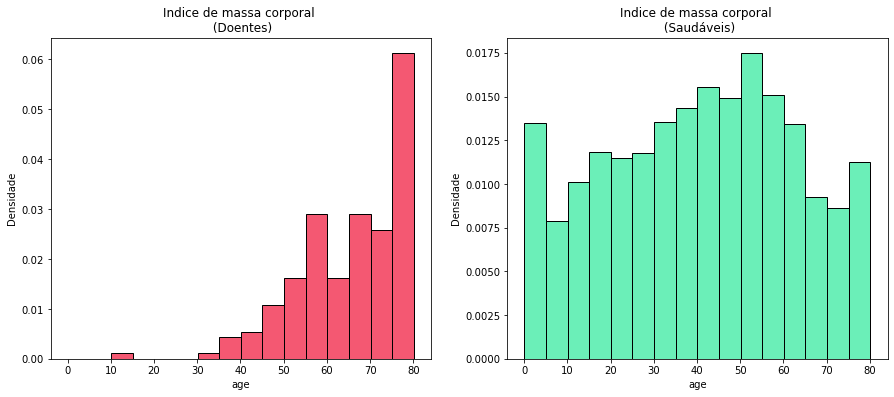

In [103]:
# Gera figura para plotagem
plt.figure(figsize=(15,13))
faixa_age = np.arange(min(Stroke.age),max(Stroke.age),5)
# Pressão sistólica para cardíacos
plt.subplot(2,2,1)
plot_hist(doente, 'age', faixa_age , '#F12043')
plt.title('Indice de massa corporal \n (Doentes)')
plt.xlabel('age')
# Pressão sistólica para saudáveis
plt.subplot(2,2,2)
plot_hist(saudavel, 'age', faixa_age , '#39eaa1')
plt.title('Indice de massa corporal \n (Saudáveis)')
plt.xlabel('age')

Observacoes:<ul>
    <li>Para os pacientes saudáveis(não tiveram AVC) percebe-se uma distribuição quase simétrica ,ou seja,não há predomínio em relação a qualquer idade.</li>
    <br>
    <li>Para pacientes doentes(tiveram AVC) nota-se uma distribuição assimétrica a esquerda.Dessa maneira ,para valores acima de 58 anos há uma grande densidade de pacientes que doentes.Logo,pode-se inferir que a idade avançada é fator preponderante para a ocorrência de AVCs.</li>
    </ul>

# Análise variáveis categóricas

Introdução:<ul>
    <li>Para as variáveis categóricas serão utilizados gráficos de barra nos quais há uma porcentagem para cada categoria da respectiva variável.Dessa maneira,a exploração de dados fica mais rica e ,portanto,a análise será melhor aproveitada em predições posteriores.

In [108]:
var_categoricas=Stroke.iloc[:,[0,2,3,4,5,6,9,10]]
var_categoricas


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Homem,Não Hipertenso,Cardiopata,Sim,Privado,Urbano,Ex-Fumante,Doente
2,Homem,Não Hipertenso,Cardiopata,Sim,Privado,Rural,Nunca Fumou,Doente
3,Mulher,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,Fumante,Doente
4,Mulher,Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,Nunca Fumou,Doente
5,Homem,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,Ex-Fumante,Doente
...,...,...,...,...,...,...,...,...
5104,Mulher,Não Hipertenso,Não Cardiopata,Não,Criança,Rural,Desconhecido,Saudável
5106,Mulher,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Urbano,Nunca Fumou,Saudável
5107,Mulher,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,Nunca Fumou,Saudável
5108,Homem,Não Hipertenso,Não Cardiopata,Sim,Privado,Rural,Ex-Fumante,Saudável


# Distribuição dos Pacientes

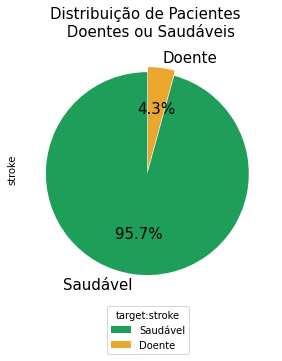

In [105]:
#dividindo o index da categoria stroke
lista_labels=list(var_categoricas["stroke"].value_counts().index)
# configura tamanho da imagem
plt.figure(figsize=(10,15))

# Plota o gráfico inicial: Distribuição da Target
plt.subplot(1, 2, 1)
Stroke["stroke"].value_counts(sort=False).plot.pie(autopct='%1.1f%%', explode= [0.05, 0],
                                                                           textprops={'fontsize': 15},
                                           startangle = 90, labels=lista_labels, 
                                           colors=['#1E9E58', '#EBA72D', '#44EB90'])
titulo = 'Distribuição de Pacientes \n Doentes ou Saudáveis'
plt.title(titulo, fontsize=15)
plt.legend(loc=8, title = 'target:stroke', title_fontsize=10, 
           bbox_to_anchor=(0.25, -0.25, 0.5, 0.5),  fontsize=10)

Observacoes:<ul>
    <li>Para o conjunto de dados análisado percebe-se uma discrepância entre os pacientes saudáveis(não tiveram AVC) e doentes(tiveram AVC).Desse modo,quase 96% dos pacientes analisados não tiveram AVC,isto é,para a análise dos pacientes doentes foram disponibilizados poucos valores(4.3% do total) em relaçao a todos os valores da base de dados.Dessa maneira,imprecisões maiores poderão ser análisadas na exploração e predição de valores em relação aos pacientes doentes no prosseguimento do projeto.  

In [106]:
#importando bibliotecas para a análise interativa
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
var_categoricas


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Homem,Não Hipertenso,Cardiopata,Sim,Privado,Urbano,Ex-Fumante,Doente
2,Homem,Não Hipertenso,Cardiopata,Sim,Privado,Rural,Nunca Fumou,Doente
3,Mulher,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,Fumante,Doente
4,Mulher,Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,Nunca Fumou,Doente
5,Homem,Não Hipertenso,Não Cardiopata,Sim,Privado,Urbano,Ex-Fumante,Doente
...,...,...,...,...,...,...,...,...
5104,Mulher,Não Hipertenso,Não Cardiopata,Não,Criança,Rural,Desconhecido,Saudável
5106,Mulher,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Urbano,Nunca Fumou,Saudável
5107,Mulher,Não Hipertenso,Não Cardiopata,Sim,Trabalhador Autônomo,Rural,Nunca Fumou,Saudável
5108,Homem,Não Hipertenso,Não Cardiopata,Sim,Privado,Rural,Ex-Fumante,Saudável


In [107]:
#analise interativa das variaveis categoricas
@interact(categorias=sorted(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status']))
#funcao que faz a tabela_cruzada bem como o grafico barplot para as categoricas
def tabela_cruzada(categorias):
    tabela=pd.crosstab(index=var_categoricas.stroke,columns=var_categoricas[categorias],normalize='index')*100
    display(HTML(tabela.to_html()))
    tabela.plot(kind='bar', stacked=True)
    plt.title(f"Distribuição de doentes e saudáveis por {categorias}")
    plt.legend( bbox_to_anchor=(1.05, 1), borderaxespad=0.)


interactive(children=(Dropdown(description='categorias', options=('Residence_type', 'ever_married', 'gender', …

Conclusão:<ul>
    <li>Variável Residence_type:Para o tipo de residência os valores coletados não indicam disparidade entre os pacientes que moram em ambientes rurais ou urbanos.Logo ,a variável não possui indicativos de que pode ajudar na predição do AVC.</li>
    <br>
    <li>Variável ever_married:Em relação a variável que indica o casamento,percebe-se pelo análise gráfica que ,em relação aos pacientes doentes,a grande maioria é casado.Portanto,a convivência com outra pessoa pode indicar maiores possibilidades de AVC.</li>
    <br>
    <li>Variável gender:Para ambos tipos de paciente ,sejam eles doentes ou saudáveis,quase 60% dos pacientes são do sexo masculino.No entanto,a disparidade é muita pequena entre os valores e ,dessa maneira,ainda não se pode prever o sexo predominante para quem possui ou não AVC.</li>
    <br>
    <li>Variável heart_disease:Observando-se a variável que diz respeito a ocorrência de cardiopatia percebe-se uma maior chance(19% do total de doentes) de um paciente cardiopata já ter tido AVC do que um paciente cardiopata não ter tido AVC(4% do total de saudáveis).Portanto,as cardiopatias podem ser indícios para uma maior chance de AVC.</li>
    <br>
    <li>Variável hypertension:Em analogia a variável heart_disease pode-se percebe-se o mesmo comportamento para a categoria que análisa a ocorrência de hipertensão,ou seja,para pacientes hipertensos(28.7% do total de doentes) há uma maior chance de ocorrência de AVC em relação aos pacientes hipertensos que não tiveram AVC(8.3% do total de saudáveis).Portanto,a hipertensão pode ser indício para uma maior chance de AVC.</li>
    <br>
    <li>Variável smoking_status:Considerando pacientes que tiveram AVC há um crescimento percentual de fumantes e ex-fumantes em relação aqueles pacientes considerados saudáveis(tiveram AVC).Então,o tabaco pode,em alguma medida,influenciar na possivel ocorrência de acidentes vasculares cerebrais.</li>
    <br>
    <ul>Variável work_type:
            <li>Trabalho Governamental,Nunca Trabalhou,Privado:Para estes tipos de trabalho não se notou quase nenhuma diferença entre os pacientes saudáveis ou doentes,embora para os pacientes que tiveram AVC a grande maioria(60%) trabalham em ambientes privados.Nesse sentido o ambiente privado pode,em alguma medida,se mostrar como um indicador de acidentes vasculares cerebrais.</li>
            <br>
            <li>Trabalhadores autônomos:Para os trabalhadores autônomos há uma maior concentração de pacientes doentes(25.7% do total de doentes) em relação aos saudáveis(15.3 % do total de saudáveis).Dessa maneira,apesar da pequena disparidade pode haver em relação a ser trabalhador autônomo ,visto que esta categoria não possui emprego certo.Logo,há maior chance do desenvolvimento de um AVC.</li>
            <br>
            <li>Para crianças não podem ser feitas análises precisas visto que são poucos os dados de crianças(independente da idade) que tiveram AVC.Logo,para esta categoria não se pode predizer muito. </li>

# Modelos de predição

# Regressão Logística

# Arvore de decisão